In [2]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

DATASET_PATH = '../data/originals/'


In [3]:
files = os.listdir(DATASET_PATH)

In [4]:
files[300]

'4_original_455.png'

In [5]:
origimg = cv2.imread(os.path.join(DATASET_PATH,files[random.randint(0,len(files))]))

In [8]:
x = cv2.imread(os.path.join(DATASET_PATH,files[random.randint(0,len(files))]),cv2.IMREAD_GRAYSCALE)

In [11]:
y = cv2.cvtColor(x,cv2.COLOR_GRAY2BGR)

In [12]:
y.shape

(200, 200, 3)

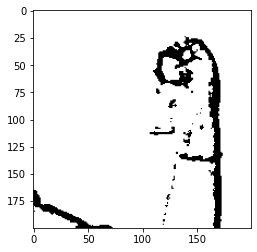

In [135]:
masked = cv2.cvtColor(origimg, code=cv2.COLOR_BGR2GRAY)
masked = cv2.GaussianBlur(masked, ksize=(3,3), sigmaX=0)
masked = cv2.adaptiveThreshold(masked, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               thresholdType=cv2.THRESH_BINARY_INV, blockSize=19, C=3)
ret, masked = cv2.threshold(masked, thresh=10, maxval=255, type=cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Display
img = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)
plt.imshow(img)

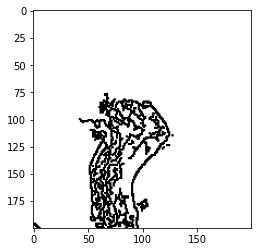

In [118]:
masked = cv2.cvtColor(origimg, code=cv2.COLOR_BGR2GRAY)
# masked = cv2.bilateralFilter(masked, 5, 50, 50)
masked = cv2.Canny(masked, 5, 30)
kernel = np.ones((2, 2), np.uint8)
masked = cv2.dilate(masked, kernel)
masked = ~masked

# Display
img = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)
plt.imshow(img)